# Citi Bike(New York) Trip Data Analysis for 2014
## by Manju Saini

## Preliminary Wrangling

> The Datset is taken from https://www.citibikenyc.com/system-data. It contains data about rides and have features - Trip Duration (seconds), Start Time and Date, Stop Time and Date, Start Station Name,End Station Name, Station ID, Station Lat/Long, Bike ID, User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member), Gender (Zero=unknown; 1=male; 2=female), Year of Birth.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# One time step -  Unzipping the downloaded files
# from zipfile import ZipFile 
  
# # specifying the zip file name 
# for year in np.arange(2014, 2017):
#     for month in np.arange(1, 13):
#         m_str = str(month)
#         if len(m_str)<2:
#             m_str = "0"+m_str
#         file_name = str(year)+m_str+"-citibike-tripdata.zip"
#         with ZipFile(file_name, 'r') as zip:
#             zip.extractall()
#             print('Done!')

# # trip = pd.read_csv("2017-fordgobike-tripdata.csv")


In [3]:
# One time step - Merging all dataframes into one, to get data for year 2014
# trip_all = pd.DataFrame()

# for year in np.arange(2014, 2015):
#     for month in np.arange(1, 13):
#         m_str = str(month)
#         if len(m_str)<2:
#             m_str = "0"+m_str
#         file_name = str(year)+m_str+"-citibike-tripdata.csv"
# #         print(file_name)
#         if trip_all.empty:
#             trip_all = pd.read_csv(file_name)
#         else:
#             new_df = pd.read_csv(file_name)
# #             trip_all = trip_all.append(new_df, ignore_index=True)
#             print("Before "+file_name+" trip_all.shape: ",trip_all.shape[0], "new_df.shape: ",new_df.shape[0])
#             trip_all = pd.concat([trip_all, new_df], ignore_index=True)
#             print("After "+file_name+" trip_all.shape: ",trip_all.shape[0])
# #         df.head()
#     print("Complete")
    

In [4]:
# Fetching a randam sample of 10000 records only, as the data for whole year is too big for processing and writing to trip_sample_10000.csv
# samples = np.random.choice(trip_all.shape[0], 10000, replace = False)
# trip_samp = trip_all.loc[samples,:]
# trip_samp.to_csv("trip_sample_10000.csv", index=False)

In [5]:
trip = pd.read_csv("trip_sample_10000.csv")

In [6]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
tripduration               10000 non-null int64
starttime                  10000 non-null object
stoptime                   10000 non-null object
start station id           10000 non-null int64
start station name         10000 non-null object
start station latitude     10000 non-null float64
start station longitude    10000 non-null float64
end station id             10000 non-null int64
end station name           10000 non-null object
end station latitude       10000 non-null float64
end station longitude      10000 non-null float64
bikeid                     10000 non-null int64
usertype                   10000 non-null object
birth year                 9708 non-null object
gender                     10000 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.1+ MB


In [7]:
trip.dropna(subset=['start station id','end station id', 'bikeid','start station name', 'end station name', 'usertype'], axis=0, inplace=True)

In [8]:
# date type columns to correct format
for d_col in ['starttime', 'stoptime']:
    trip[d_col] = pd.to_datetime(trip[d_col])

In [9]:
trip.sort_values(by='starttime', inplace=True)

In [10]:
# int colums to str type
for int_col in ['start station id', 'end station id', 'bikeid']:
    trip[int_col] = pd.Categorical(trip[int_col], categories = trip[int_col].unique(), ordered=False)

In [11]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 218 to 741
Data columns (total 15 columns):
tripduration               10000 non-null int64
starttime                  10000 non-null datetime64[ns]
stoptime                   10000 non-null datetime64[ns]
start station id           10000 non-null category
start station name         10000 non-null object
start station latitude     10000 non-null float64
start station longitude    10000 non-null float64
end station id             10000 non-null category
end station name           10000 non-null object
end station latitude       10000 non-null float64
end station longitude      10000 non-null float64
bikeid                     10000 non-null category
usertype                   10000 non-null object
birth year                 9708 non-null object
gender                     10000 non-null int64
dtypes: category(3), datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 1.3+ MB


In [12]:
trip.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [13]:
trip = trip[['tripduration', 'starttime', 'stoptime', 'start station id'
       ,'end station id', 'bikeid', 'usertype','birth year', 'gender','start station name', 'end station name']]

In [14]:
def get_time_of_day(x):
    return str(x.hour)

trip['starttime_hour'] = trip['starttime'].apply(get_time_of_day)
trip['starttime_day_name'] = trip['starttime'].dt.day_name()

trip['starttime_month_name'] = trip['starttime'].dt.month_name()
trip['starttime_date'] = trip['starttime'].dt.date

In [15]:
trip.shape[0]

10000

In [16]:
dayname_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
trip['starttime_day_name'] = pd.Categorical(trip['starttime_day_name'], categories=dayname_order, ordered=True)

In [17]:
months_order = ['January','February','March','April','May','June', 'July','August','September','October', 'November','December']
trip['starttime_month_name'] = pd.Categorical(trip['starttime_month_name'], categories=months_order, ordered=True)

In [18]:
hours_order = ["0",  "1",  "2",  "3",  "4",  "5",  "6",  "7",  "8",  "9", "10", "11", "12", "13", "14", "15", "16",
       "17", "18", "19", "20", "21", "22", "23"]
trip['starttime_hour'] = pd.Categorical(trip['starttime_hour'], categories=hours_order, ordered=True)

In [19]:
trip['tripduration_min'] = trip.tripduration/60

In [20]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 218 to 741
Data columns (total 16 columns):
tripduration            10000 non-null int64
starttime               10000 non-null datetime64[ns]
stoptime                10000 non-null datetime64[ns]
start station id        10000 non-null category
end station id          10000 non-null category
bikeid                  10000 non-null category
usertype                10000 non-null object
birth year              9708 non-null object
gender                  10000 non-null int64
start station name      10000 non-null object
end station name        10000 non-null object
starttime_hour          10000 non-null category
starttime_day_name      10000 non-null category
starttime_month_name    10000 non-null category
starttime_date          10000 non-null object
tripduration_min        10000 non-null float64
dtypes: category(6), datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 1.1+ MB


### What is the structure of your dataset?

> There are 10000, records in the dataset with 16 features. There are 5 categorical features, 2 datetime features, 5 string type features, 3 integer feature and 1 float feature. 

### What is/are the main feature(s) of interest in your dataset?

> I want to find out how number of bike rides are affected by usertype and time of ride. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the time of rides(starttime_hour, starttime_day_name, starttime_month_name) to have a major impact on the number of rides. I expect Customer Usertype to ride less frequently than Subscriber Usertype.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [21]:
trip.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'end station id', 'bikeid', 'usertype', 'birth year', 'gender',
       'start station name', 'end station name', 'starttime_hour',
       'starttime_day_name', 'starttime_month_name', 'starttime_date',
       'tripduration_min'],
      dtype='object')

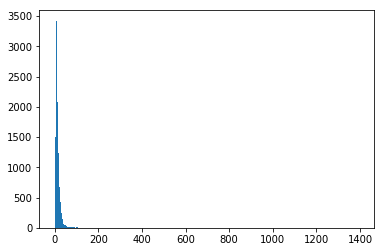

In [22]:
# Plotting distribution of tripduration_min
bins = np.arange(0, 1400, 5)

plt.hist(data=trip, x='tripduration_min', bins=bins);

Most of the data is set to the far left, suggesting some strong outliers on the right.Lets identify these outliers and see if they need to be filtered out of the data.

In [23]:
duration_df = trip.query('tripduration_min > 100')[['starttime', 'stoptime','tripduration_min','tripduration']]
duration_df['stoptime'].sub(duration_df['starttime'])/ np.timedelta64(1, 'm') - duration_df['tripduration_min']

8498    0.0
8733    0.0
8773    0.0
1048    0.0
7687    0.0
9724    0.0
3894    0.0
7888    0.0
9074    0.0
6467    0.0
5892    0.0
5094    0.0
1821    0.0
6974    0.0
1684    0.0
1116    0.0
4251    0.0
7058    0.0
1108    0.0
6793    0.0
6755    0.0
4818    0.0
2955    0.0
4472    0.0
3763    0.0
7950    0.0
3172    0.0
1573    0.0
3730    0.0
8906    0.0
6684    0.0
5538    0.0
9655    0.0
2044    0.0
2858    0.0
8470    0.0
1787    0.0
2145    0.0
6724    0.0
4383    0.0
3685    0.0
3423    0.0
2200    0.0
5703    0.0
6281    0.0
dtype: float64

In [24]:
duration_df['tripduration_hour'] = duration_df['tripduration_min']/60

In [25]:
duration_df

starttime            stoptime  tripduration_min  tripduration  \
8498 2014-01-17 12:39:24 2014-01-17 17:02:40        263.266667         15796   
8733 2014-01-25 12:52:26 2014-01-25 17:52:23        299.950000         17997   
8773 2014-02-10 11:39:03 2014-02-10 13:23:53        104.833333          6290   
1048 2014-02-11 19:45:28 2014-02-12 18:59:06       1393.633333         83618   
7687 2014-03-31 09:06:30 2014-03-31 10:52:15        105.750000          6345   
9724 2014-04-13 11:06:47 2014-04-13 13:56:24        169.616667         10177   
3894 2014-04-28 14:08:39 2014-04-28 18:05:57        237.300000         14238   
7888 2014-05-17 14:01:28 2014-05-17 16:44:37        163.150000          9789   
9074 2014-05-20 10:52:37 2014-05-20 13:53:52        181.250000         10875   
6467 2014-05-30 16:26:13 2014-05-30 18:50:43        144.500000          8670   
5892 2014-06-03 12:33:05 2014-06-03 14:17:16        104.183333          6251   
5094 2014-06-09 12:42:40 2014-06-09 16:00:59        198.316667         11899   
1821 2014-06-14 14:45:44 2014-06-14 18:07:21        201.616667         12097   
6974 2014-06-15 08:29:27 2014-06-15 10:21:25        111.966667          6718   
1684 2014-06-17 14:13:44 2014-06-17 16:40:58        147.233333          8834   
1116 2014-06-18 11:29:46 2014-06-18 14:17:00        167.233333         10034   
4251 2014-06-19 13:46:49 2014-06-19 15:42:34        115.750000          6945   
7058 2014-06-27 14:02:42 2014-06-27 16:38:20        155.633333          9338   
1108 2014-06-29 17:23:22 2014-06-29 19:12:53        109.516667          6571   
6793 2014-07-06 15:59:35 2014-07-06 17:54:23        114.800000          6888   
6755 2014-07-24 16:36:02 2014-07-24 18:38:31        122.483333          7349   
4818 2014-07-28 18:03:44 2014-07-28 19:46:38        102.900000          6174   
2955 2014-07-31 20:32:56 2014-07-31 22:33:44        120.800000          7248   
4472 2014-08-02 16:01:11 2014-08-02 17:42:11        101.000000          6060   
3763 2014-08-27 14:20:07 2014-08-27 17:32:59        192.866667         11572   
7950 2014-08-31 15:32:20 2014-08-31 17:17:20        105.000000          6300   
3172 2014-09-03 09:40:20 2014-09-03 17:11:18        450.966667         27058   
1573 2014-09-05 18:30:23 2014-09-06 14:51:53       1221.500000         73290   
3730 2014-09-10 12:18:08 2014-09-10 15:21:38        183.500000         11010   
8906 2014-09-28 09:40:46 2014-09-28 11:22:05        101.316667          6079   
6684 2014-09-28 15:55:25 2014-09-28 18:16:00        140.583333          8435   
5538 2014-09-28 16:38:42 2014-09-28 19:48:19        189.616667         11377   
9655 2014-09-29 10:03:33 2014-09-29 14:36:21        272.800000         16368   
2044 2014-09-29 15:21:14 2014-09-29 19:01:07        219.883333         13193   
2858 2014-10-02 14:04:58 2014-10-02 17:36:20        211.366667         12682   
8470 2014-10-15 19:46:32 2014-10-16 09:31:05        824.550000         49473   
1787 2014-10-25 15:18:50 2014-10-25 17:20:08        121.300000          7278   
2145 2014-10-25 16:29:11 2014-10-25 20:22:41        233.500000         14010   
6724 2014-10-30 09:02:34 2014-10-30 11:08:16        125.700000          7542   
4383 2014-10-30 15:31:15 2014-10-30 17:20:25        109.166667          6550   
3685 2014-11-19 06:52:59 2014-11-19 08:51:07        118.133333          7088   
3423 2014-11-28 11:57:23 2014-11-28 14:01:54        124.516667          7471   
2200 2014-12-07 10:29:09 2014-12-07 13:25:48        176.650000         10599   
5703 2014-12-13 13:30:03 2014-12-13 19:02:04        332.016667         19921   
6281 2014-12-14 13:42:28 2014-12-14 15:26:51        104.383333          6263   

      tripduration_hour  
8498           4.387778  
8733           4.999167  
8773           1.747222  
1048          23.227222  
7687           1.762500  
9724           2.826944  
3894           3.955000  
7888           2.719167  
9074           3.020833  
6467           2.408333  
5892           1.736389  
5094           3.30527

All the high outliers appear to be valid points.Some outliers have extremely high values of 5 to 23 hours, this can be due some system error , or some other issue. Removing these outlier for consistency.

In [26]:
# remove outlier values where tripduration_min >= 100 min
trip = trip.query('tripduration_min < 100')
trip.shape[0]

9955

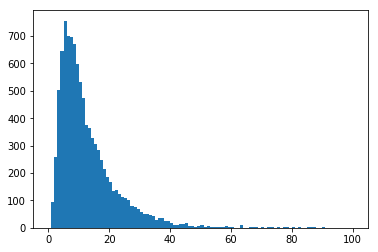

In [27]:
# Plotting distribution of tripduration_min
bin_size = 1
bins = np.arange(0, 100+bin_size, bin_size)
plt.hist(data=trip, x='tripduration_min', bins=bins);

Text(0.5, 0, 'trip duration (min)')

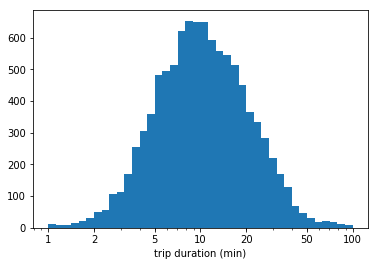

In [28]:
# tripduration_min has a long tail on the right, plotting it on log scale
# Plotting distribution of tripduration_min on log scale
log_bin_size = 0.05
bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
plt.hist(data=trip, x='tripduration_min', bins=bins)
plt.xscale('log')
x_ticks = [1, 2, 5,10,20,50,100]
plt.xticks(x_ticks, x_ticks)
plt.xlabel('trip duration (min)')

tripduration_min has a long-tailed distribution, with 45 trips having trip duration more than 100 mins and rest of the 9955 trips having trip duration less than 100 mins. When plotted on a log-scale, the price distribution looks unimodal, with peak between 5 and 20.

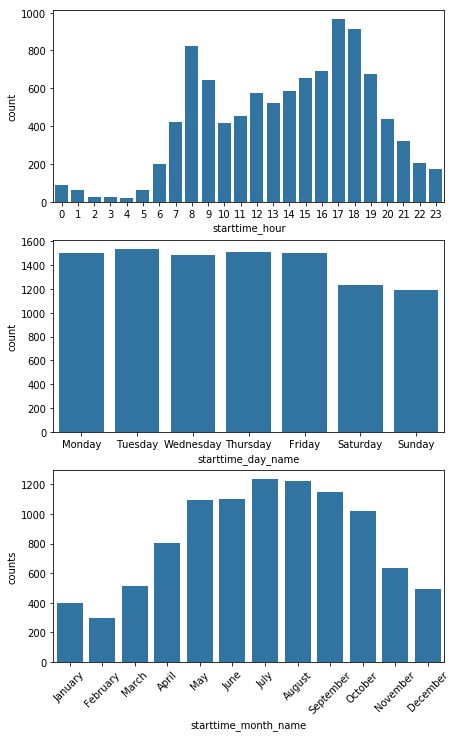

In [29]:
# Plotting hourly, weekly, monthly trend of number of rides
fig, ax = plt.subplots(nrows=3, figsize = [7,12])
base_color = sb.color_palette()[0]

cat_var = ['starttime_hour','starttime_day_name', 'starttime_month_name']
for n in np.arange(0, len(cat_var)):
    col = cat_var[n]
    sb.countplot(data=trip, x=col, color=base_color, ax = ax[n]);
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('counts')
    

Text(0.5, 0, 'Percentage of Rides')

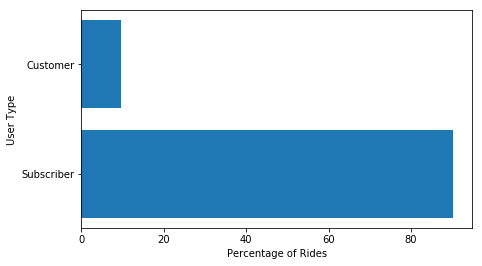

In [30]:
# Plotting percentage of total number of rides for each usertype
plt.figure(figsize=[7,4])

user_df = round(trip['usertype'].value_counts()*100/trip.shape[0], 1).reset_index().rename(columns={'index':'usertype', 'usertype':'percentage_rides'})
plt.barh(user_df['usertype'], user_df['percentage_rides'], color=base_color);
plt.ylabel('User Type')
plt.xlabel('Percentage of Rides')

In [31]:
user_df.set_index('usertype')

percentage_rides
usertype                    
Subscriber              90.3
Customer                 9.7

#### Days of week - Most of the trips are made in weekdays(Monday-Friday), this can be because of these days are working days. Also there is not a very huge difference between weekdays and weekends.

#### Month of year - Months from May to October have the most rides, with Feburary being the lowest.This can be attributed to temperature being lowest in February.

#### Time of Day -  The plot is majorly bimodal, with peaks between 8 - 10 hours, 15 - 20 hours and small peak at 12 hours. People are riding while travelling  to/from office and for lunch at 12 hours.

#### User type - 90.3% of the rides are taken by Subscribers and 9.7% by Customers. Thats a huge difference.

Next, I will analyze Number of rides starting from each station and ending to each station

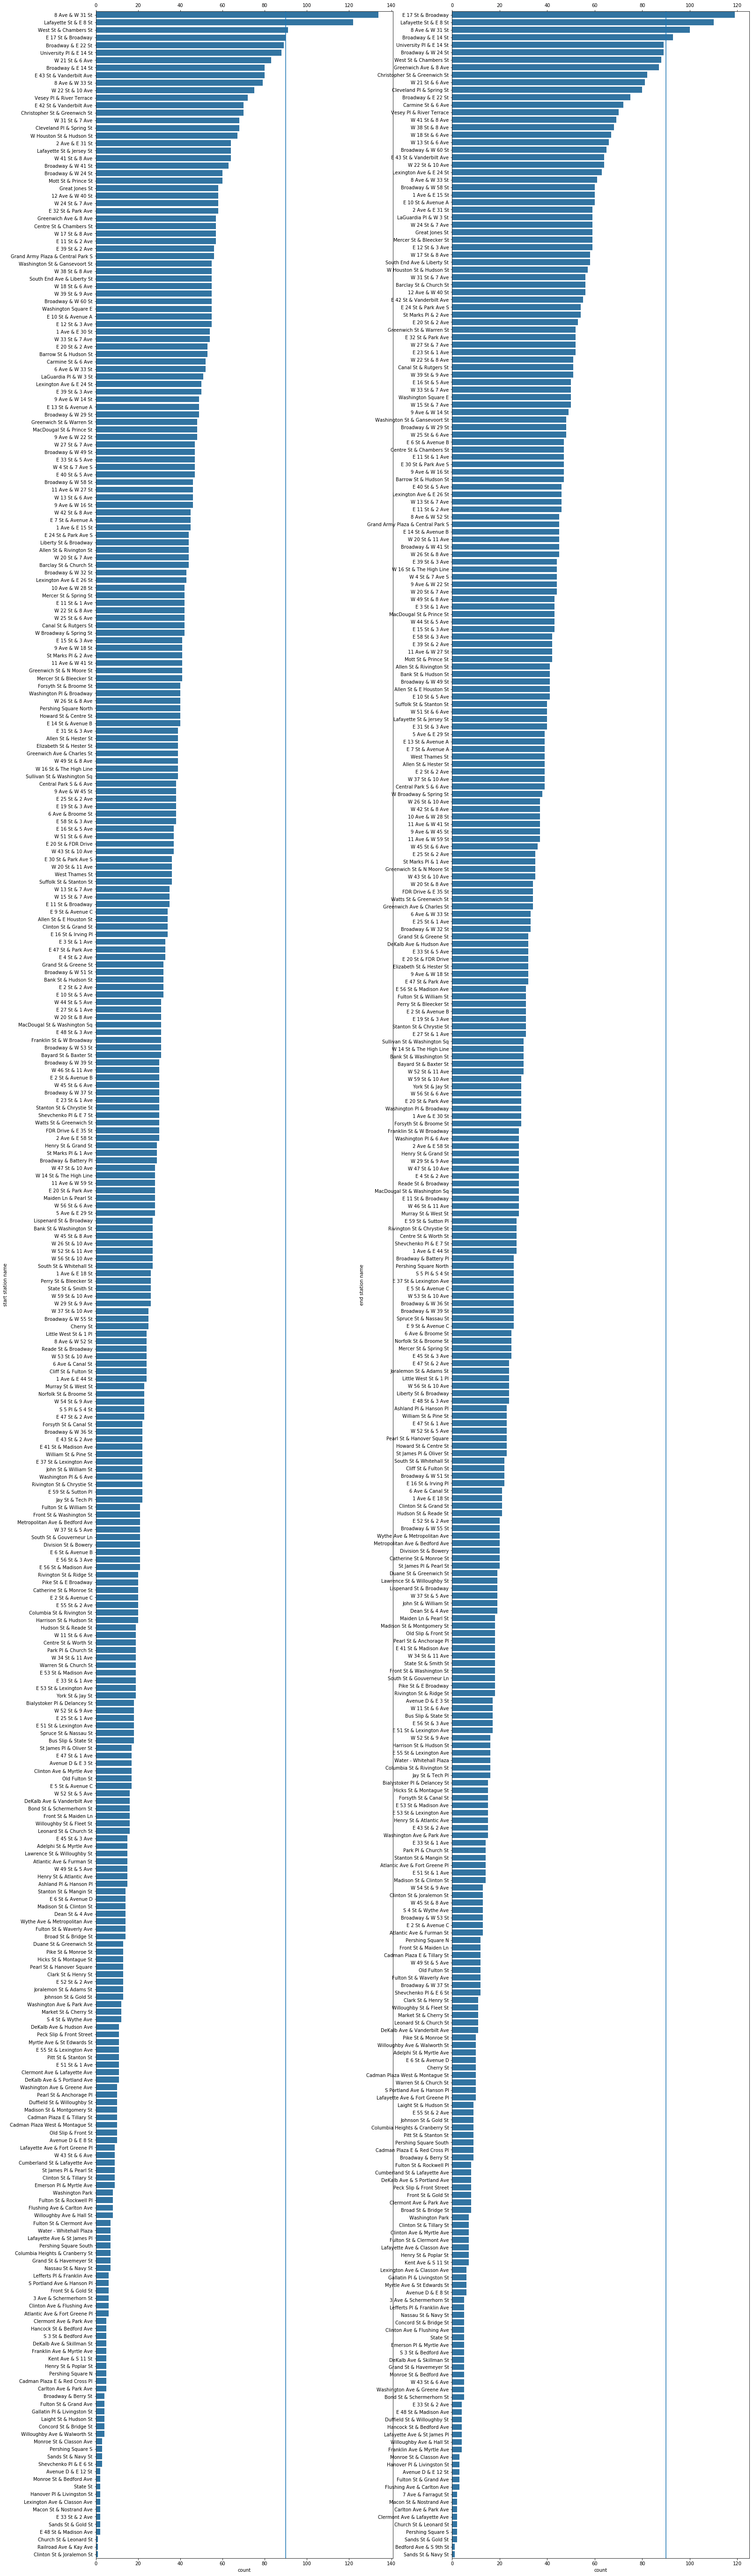

In [32]:
# Plotting total number of outgoing rides for each station in descending order
plt.figure(figsize=[25, 100])
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.subplot(1,2,1)
col = 'start station name'
start_station_order = trip['start station name'].value_counts().index
sb.countplot(data=trip, y=col, color=sb.color_palette()[0], order=start_station_order);
plt.ylabel(col)
plt.xlabel("count")
plt.axvline(90)

# Plotting total number of incoming rides for each station in descending order
plt.subplot(1,2,2)
col = 'end station name'
end_station_order = trip['end station name'].value_counts().index
sb.countplot(data=trip, y=col, color=sb.color_palette()[0], order=end_station_order);
plt.ylabel(col)
plt.xlabel("count")
plt.axvline(90)

plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

#### Start Station which has most number of outgoing rides is not the one having most number of incoming rides. Now, lets find out the stations with most number of incoming and outgoing rides (maximum traffic) and least number of incoming and outgoing rides (minimum traffic).. 

In [33]:
# preparing data for plotting total number of rides for each station in descending order
starting_rides = trip.groupby('start station name').agg({'bikeid':'count'}).reset_index().rename(columns={'bikeid': 'start station bike count'})

In [34]:
# preparing data for plotting total number of rides for each station in descending order
ending_rides = trip.groupby('end station name').agg({'bikeid':'count'}).reset_index().rename(columns={'bikeid': 'end station bike count'})

In [35]:
# preparing data for plotting total number of rides for each station in descending order
bikes_count_df = pd.merge(left=starting_rides, right=ending_rides, how='outer', left_on='start station name', right_on='end station name')
bikes_count_df.dropna(subset=['start station name'], inplace=True, axis=0)
bikes_count_df['end station bike count'].fillna(0, inplace=True)
bikes_count_df['total_bike_count'] = bikes_count_df['start station bike count'] + bikes_count_df['end station bike count']
bikes_count_df.sort_values('total_bike_count', ascending=True, inplace=True)

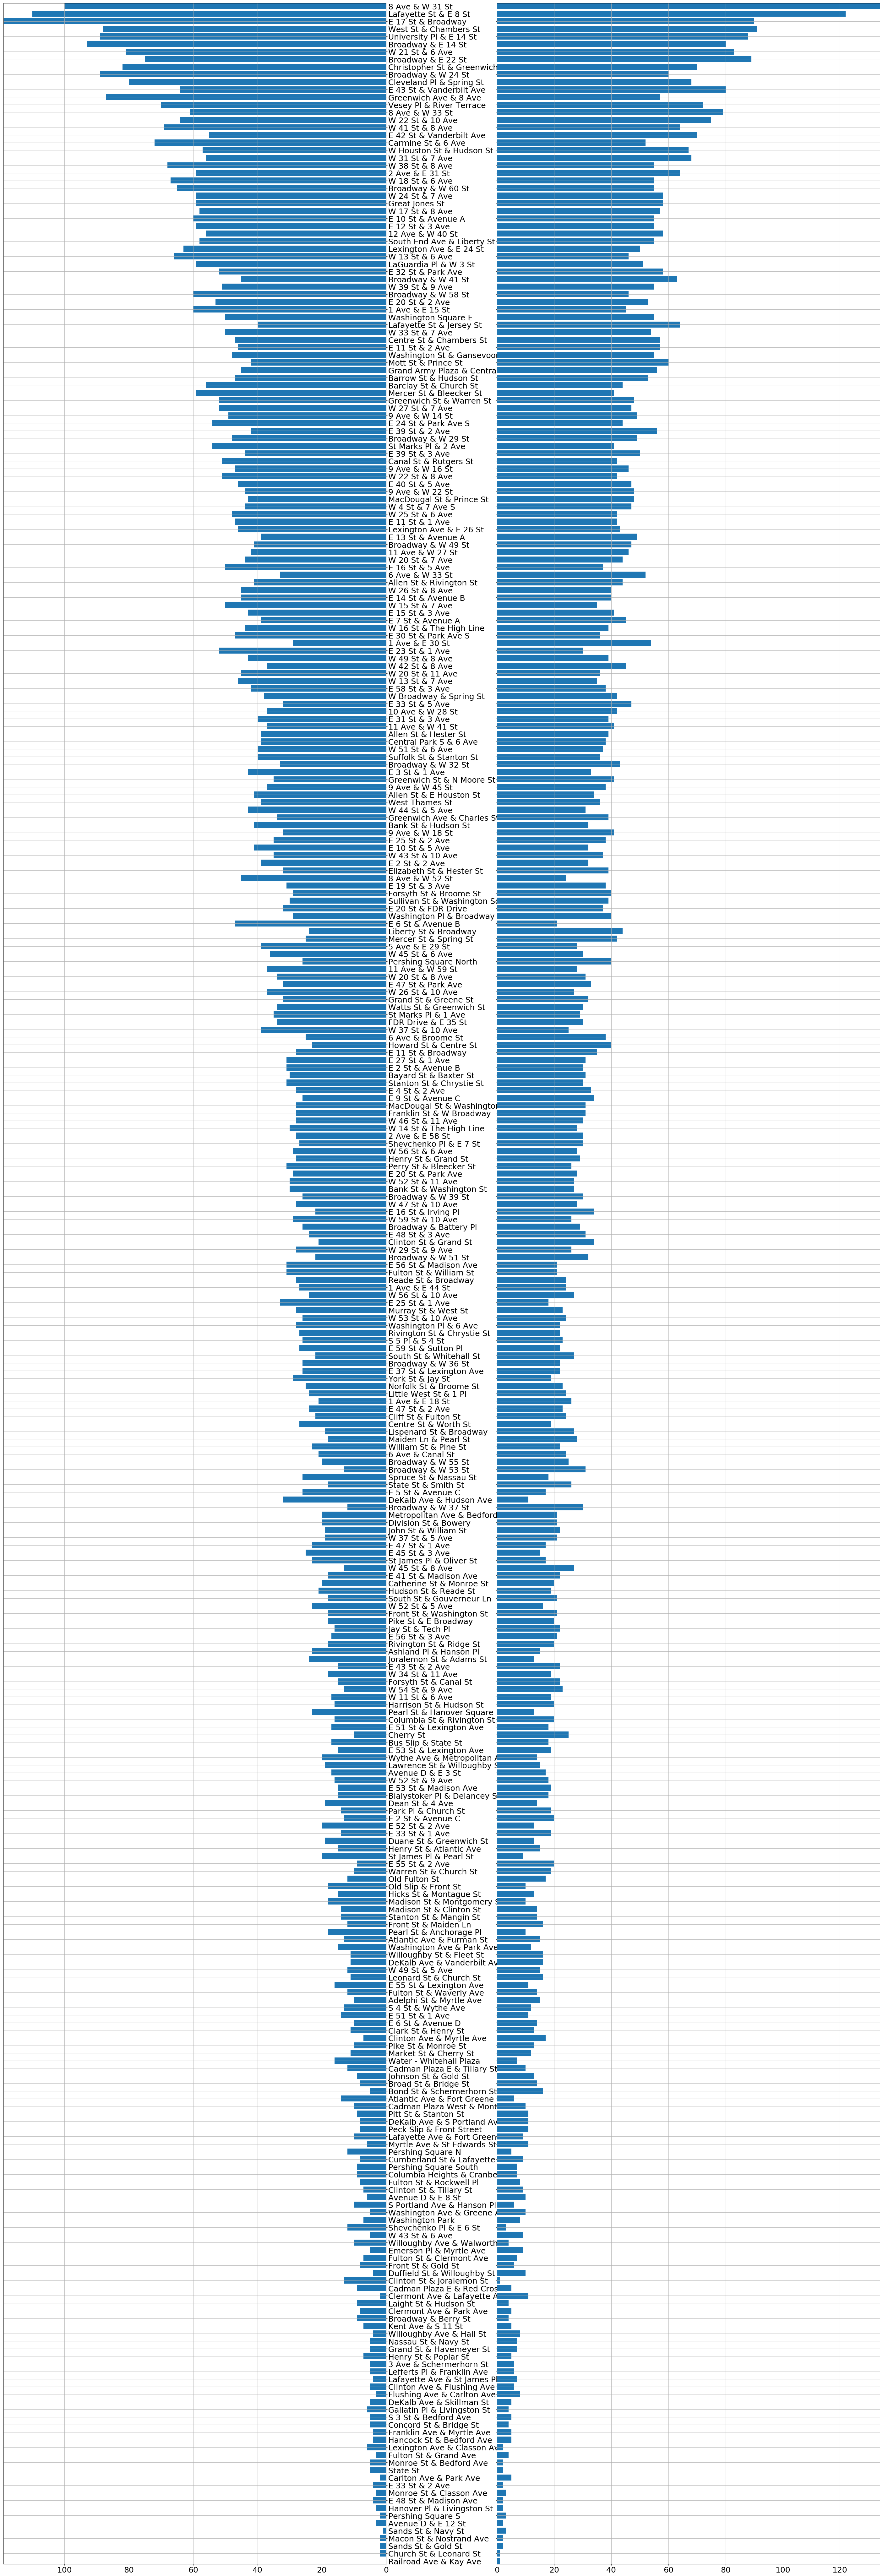

In [36]:
# Plotting total number of rides for each station in descending order
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=[50, 150])
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
y = np.arange(bikes_count_df['start station name'].shape[0])
axes[0].barh(y, bikes_count_df['end station bike count'])
axes[1].barh(y, bikes_count_df['start station bike count'])
axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=bikes_count_df['start station name'])
axes[0].yaxis.tick_right()

for ax in axes:
    ax.tick_params(labelsize=25)
    
fig.subplots_adjust(wspace=0.29)

for ax in axes.flat:
    ax.margins(0)
    ax.grid(True)

# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

In [37]:
bikes_count_df.tail(10).sort_values('total_bike_count', ascending=False)[['start station name','start station bike count','end station bike count']].set_index('start station name')

start station bike count  \
start station name                                        
8 Ave & W 31 St                                   134.0   
Lafayette St & E 8 St                             122.0   
E 17 St & Broadway                                 90.0   
West St & Chambers St                              91.0   
University Pl & E 14 St                            88.0   
Broadway & E 14 St                                 80.0   
Broadway & E 22 St                                 89.0   
W 21 St & 6 Ave                                    83.0   
Christopher St & Greenwich St                      70.0   
Broadway & W 24 St                                 60.0   

                               end station bike count  
start station name                                     
8 Ave & W 31 St                                 100.0  
Lafayette St & E 8 St                           110.0  
E 17 St & Broadway                              119.0  
West St & Chambers St                            88.0  
University Pl & E 14 St                          89.0  
Broadway & E 14 St                               93.0  
Broadway & E 22 St                               75.0  
W 21 St & 6 Ave                                  81.0  
Christopher St & Greenwich St                    82.0  
Broadway & W 24 St                               89.0

#### Top 10 Stations with maximum traffic are - '8 Ave & W 31 St', 'Lafayette St & E 8 St', 'E 17 St & Broadway','West St & Chambers St', 'University Pl & E 14 St','Broadway & E 14 St', 'Broadway & E 22 St', 'W 21 St & 6 Ave', 'Christopher St & Greenwich St', 'Broadway & W 24 St'

In [38]:
bikes_count_df.head(10)[['start station name','start station bike count','end station bike count']].set_index('start station name')

start station bike count  end station bike count
start station name                                                          
Railroad Ave & Kay Ave                           1.0                     0.0
Church St & Leonard St                           1.0                     2.0
Sands St & Gold St                               2.0                     2.0
Macon St & Nostrand Ave                          2.0                     2.0
Sands St & Navy St                               3.0                     1.0
Avenue D & E 12 St                               2.0                     3.0
Pershing Square S                                3.0                     2.0
Hanover Pl & Livingston St                       2.0                     3.0
E 48 St & Madison Ave                            2.0                     4.0
Monroe St & Classon Ave                          3.0                     3.0

#### 10 Stations with least traffic are - 'Railroad Ave & Kay Ave', 'Church St & Leonard St', 'Sands St & Navy St', 'Macon St & Nostrand Ave', 'Sands St & Gold St', 'Hanover Pl & Livingston St', 'Pershing Square S', 'Avenue D & E 12 St', 'Monroe St & Classon Ave', 'E 33 St & 2 Ave'

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> tripduration_min has a long-tailed distribution. When plotted on a log-scale, the price distribution looks unimodal, with peak between 5 and 20. Few datapoint with unusually high trip duration were removed from dataset.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most of the trips are made in weekdays(Monday-Friday), this can be because of these days are working days. However, there is not a very huge difference between weekdays and weekends, which needs further investigation

> Plot for Time of Day Vs Count - is majorly bimodal, with peaks between 8 - 10 hours, 15 - 20 hours but has a small peak at 12 hours. People are riding while travelling to office and back to home but a small peak at 12 hours which needs further investigation.

> User type - 90.3% of the rides are taken by Subscribers and 9.7% by Customers. There is a huge difference between the two.

## Bivariate Exploration

Lets look at the correlation between categorical variables.

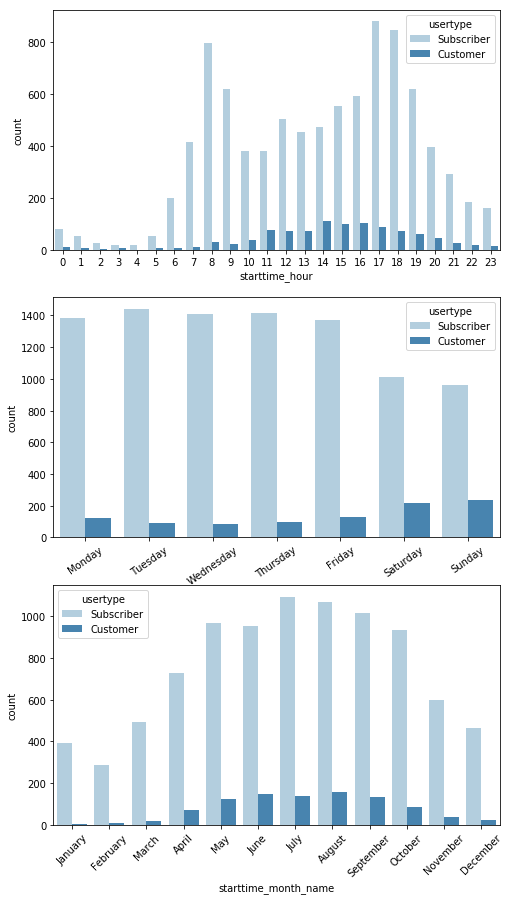

In [39]:
# Plotting hourly, weekly, monthly trend of number of rides for each user type
plt.figure(figsize = [8, 15])

plt.subplot(3, 1, 1)
sb.countplot(data = trip, x = 'starttime_hour', hue = 'usertype', palette = 'Blues')

ax = plt.subplot(3, 1, 2)
sb.countplot(data = trip, x = 'starttime_day_name', hue = 'usertype', palette = 'Blues')
plt.xticks(rotation=35)

ax = plt.subplot(3, 1, 3)
sb.countplot(data = trip, x = 'starttime_month_name', hue = 'usertype', palette = 'Blues')
plt.xticks(rotation=45)

plt.show()

#### Time of Day- plot for rides by subscriber usertype is bimodal with high counts, however plot for rides by customer usertype is unimodal.

#### Day of week - rides by Subscribers reduce on weekends(Saturday and Sunday) , however rides for Customer increases on weekends(Saturday and Sunday) but still rides by Subsciber on weekends is greater than by Customer.

#### Month of year - plot for number of rides by both - subscriber and customer, are unimodal with most of the rides between May and October

Lets look at how trip_duration_min correlates with hour, day and month

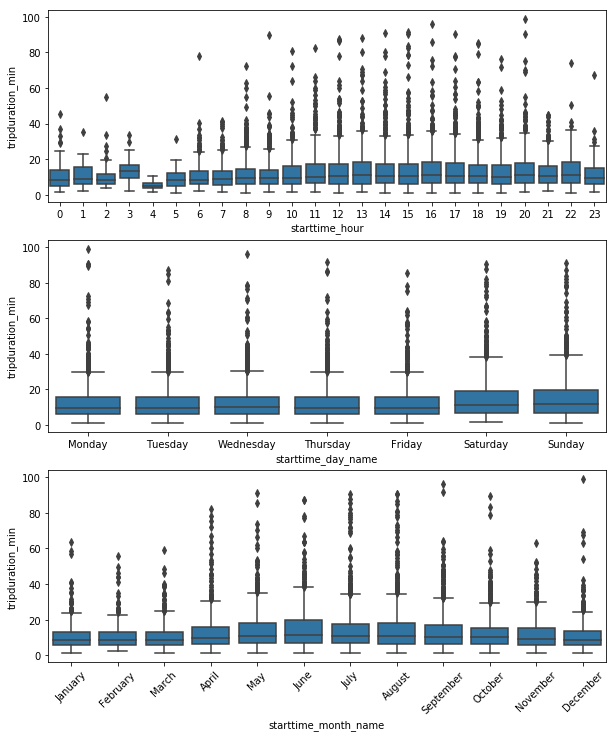

In [40]:
# Plotting hourly trend for tripduration_min
fig, ax = plt.subplots(ncols = 1, nrows = 3 , figsize = [10,12])
categoric_vars = ['starttime_hour','starttime_day_name','starttime_month_name']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.boxplot(data=trip, x=var, y='tripduration_min', color=base_color, ax = ax[i])
    plt.xticks(rotation=45)

Plotting 'starttime_hour','starttime_day_name','starttime_month_name' Vs log_tripduration_min , to analyze it better

In [41]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
# creating log_tripduration_min column for ease of analysis 
trip['log_tripduration_min'] = trip['tripduration_min'].apply(log_trans)

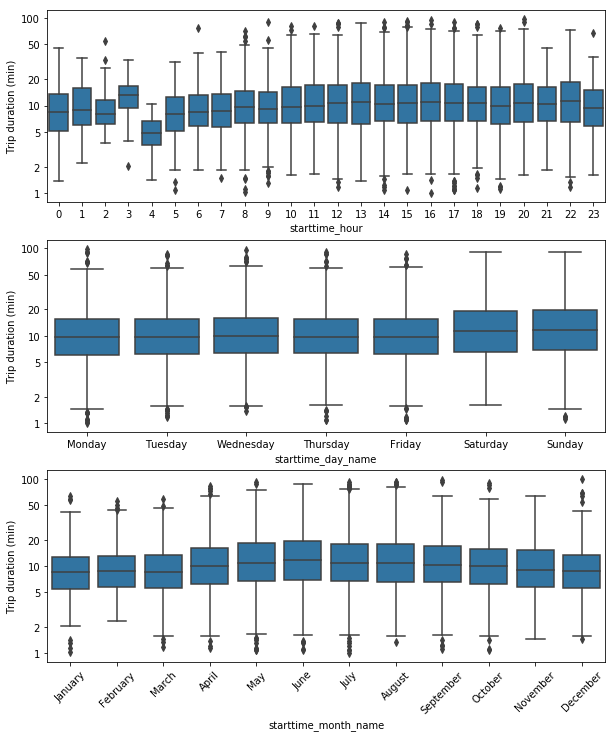

In [42]:
# Plotting hourly trend for tripduration_min on log scale
fig, ax = plt.subplots(ncols = 1, nrows = 3 , figsize = [10,12])
categoric_vars = ['starttime_hour','starttime_day_name','starttime_month_name']
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.boxplot(data=trip, x=var, y='log_tripduration_min', color=base_color, ax = ax[i])
    y_ticks = [1,2,5,10,20,50,100]
    ax[i].set_yticks(log_trans(np.array(y_ticks)))
    ax[i].set_yticklabels(y_ticks)
    ax[i].set_ylabel("Trip duration (min)")
    plt.xticks(rotation=45)

#### During early morning hours tripduration is lower, increases in the day, and then increases at 16 hours. During weekdays tripduration is low, however it increses on weekends. With Months, the tripduration increases and then decreases.

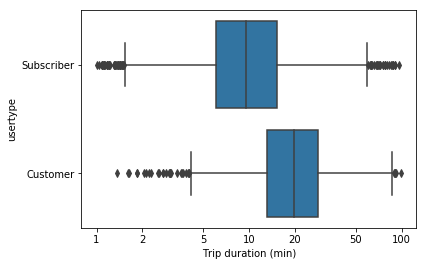

In [43]:
# Plotting tripduration_min Vs usertype
var = 'usertype'
sb.boxplot(data=trip, y=var, x='log_tripduration_min', color=base_color)
x_ticks = [1,2,5,10,20,50,100]
plt.xticks(log_trans(np.array(x_ticks)),x_ticks);
plt.xlabel('Trip duration (min)');

#### Subscribers generally have higher trip duration as compared to Customer. Now I will analyse the effect of usertype on count of rides from specific stations.

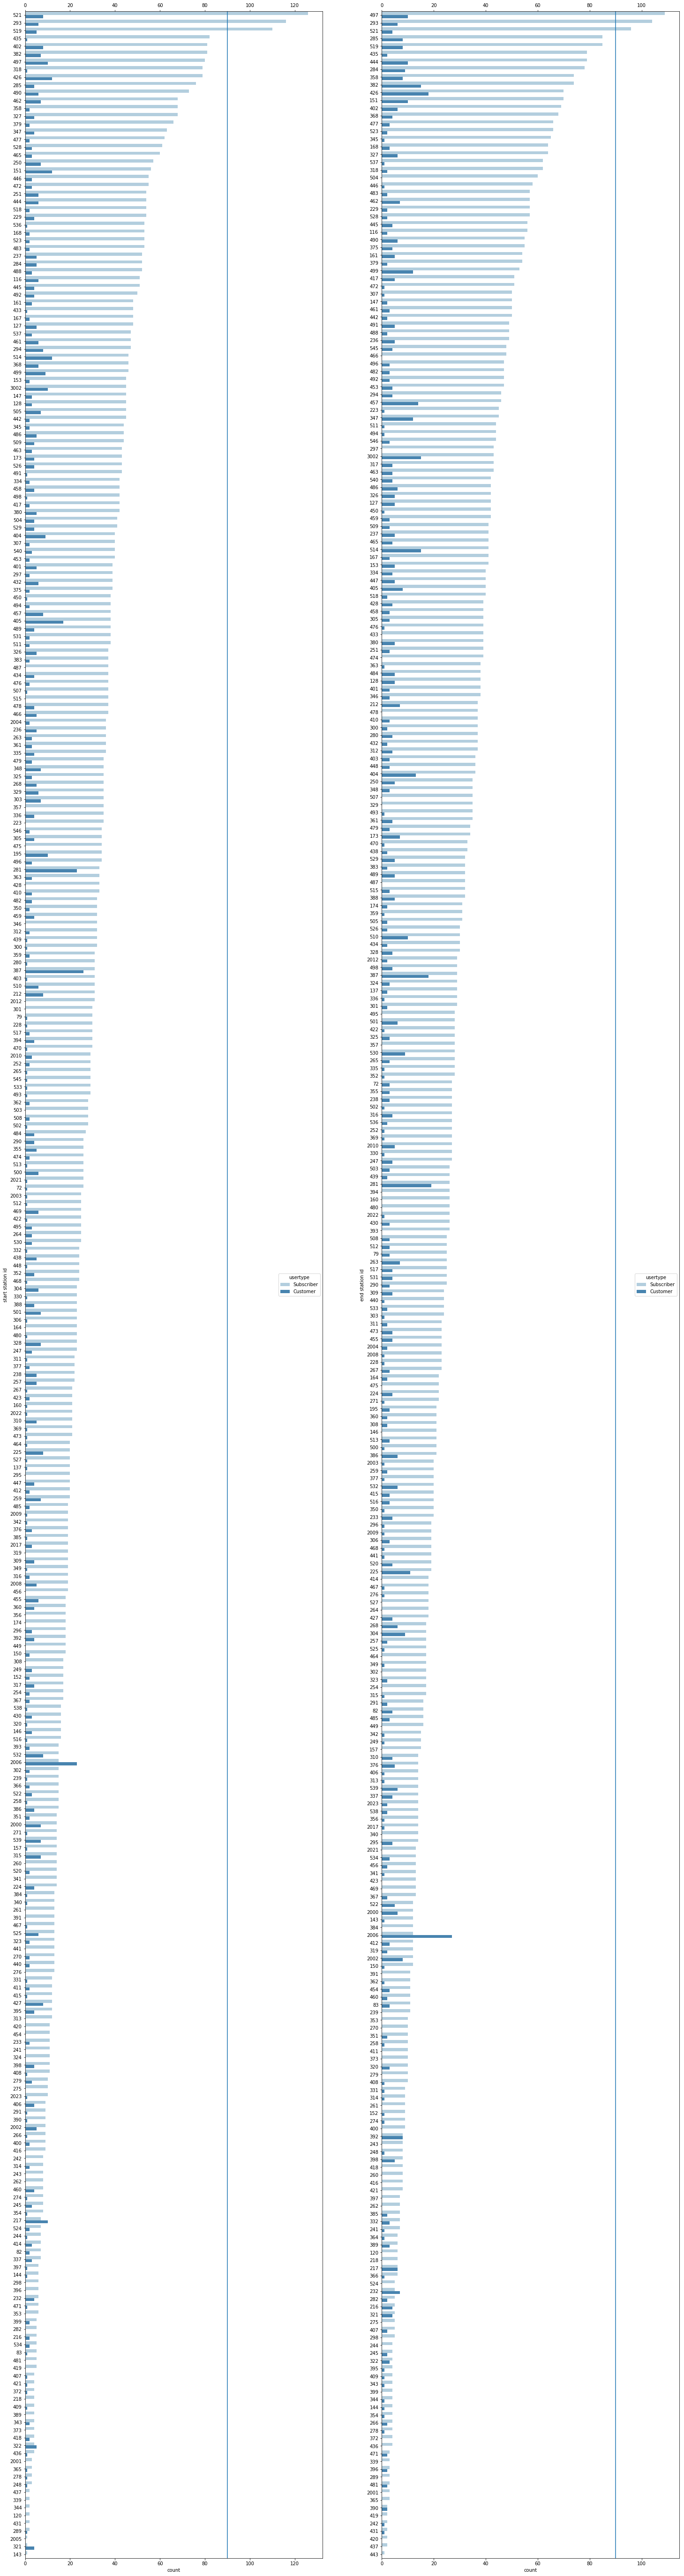

In [44]:
# Plotting total number of rides for each station in descending order for  Subscriber and Customer
plt.figure(figsize=[25, 100])
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.subplot(1,2,1)
col = 'start station id'
start_station_order = trip[trip['usertype']=='Subscriber']['start station id'].value_counts().index
sb.countplot(data=trip, y=col, hue = 'usertype', order=start_station_order, palette = 'Blues');
plt.ylabel(col)
plt.xlabel("count")
plt.axvline(90)

plt.subplot(1,2,2)
col = 'end station id'
end_station_order = trip[trip['usertype']=='Subscriber']['end station id'].value_counts().index
sb.countplot(data=trip, y=col, hue = 'usertype', order=end_station_order, palette = 'Blues');
plt.ylabel(col)
plt.xlabel("count")
plt.axvline(90)

plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

#### Stations having higher Subsriber traffic does not have higher customer traffic. Subscriber traffic and Customer traffic are independent of each other.Some stations even have zero traffic.

Trip duration Vs Month -  Trip duration is longer for months from April to October. 

Trip duration Vs Day of Week - Trip duration is longer on Saturday and Sundays. univariate analysis, less number of trips were taken on Saturday Sunday. Combining the two analysis, more number of short trips are taken on weekdays, and more number of long trips are taken on Weekends

Trip duration Vs Time of Day - Surprisingly Trip duration is maximum at 3 hours and plunges to minimum at 4 hours. This is an area to be investigated.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> starttime_hour vs count plot is unimodal for Subscribers is bimodal, however it is unimodal for Customers

> count of rides by Subscriber decreases on weekends however it increases for Customers

> month wise trend for count of rides follow similar trend for both Subscriber and Customer

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Trip duration is longer on Saturday and Sundays. univariate analysis, less number of trips were taken on Saturday Sunday. Combining the two analysis, more number of short trips are taken on weekdays, and more number of long trips are taken on Weekends

> Surprisingly Trip duration is maximum at 3 hours and plunges to minimum at 4 hours.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [45]:
trip.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'end station id', 'bikeid', 'usertype', 'birth year', 'gender',
       'start station name', 'end station name', 'starttime_hour',
       'starttime_day_name', 'starttime_month_name', 'starttime_date',
       'tripduration_min', 'log_tripduration_min'],
      dtype='object')

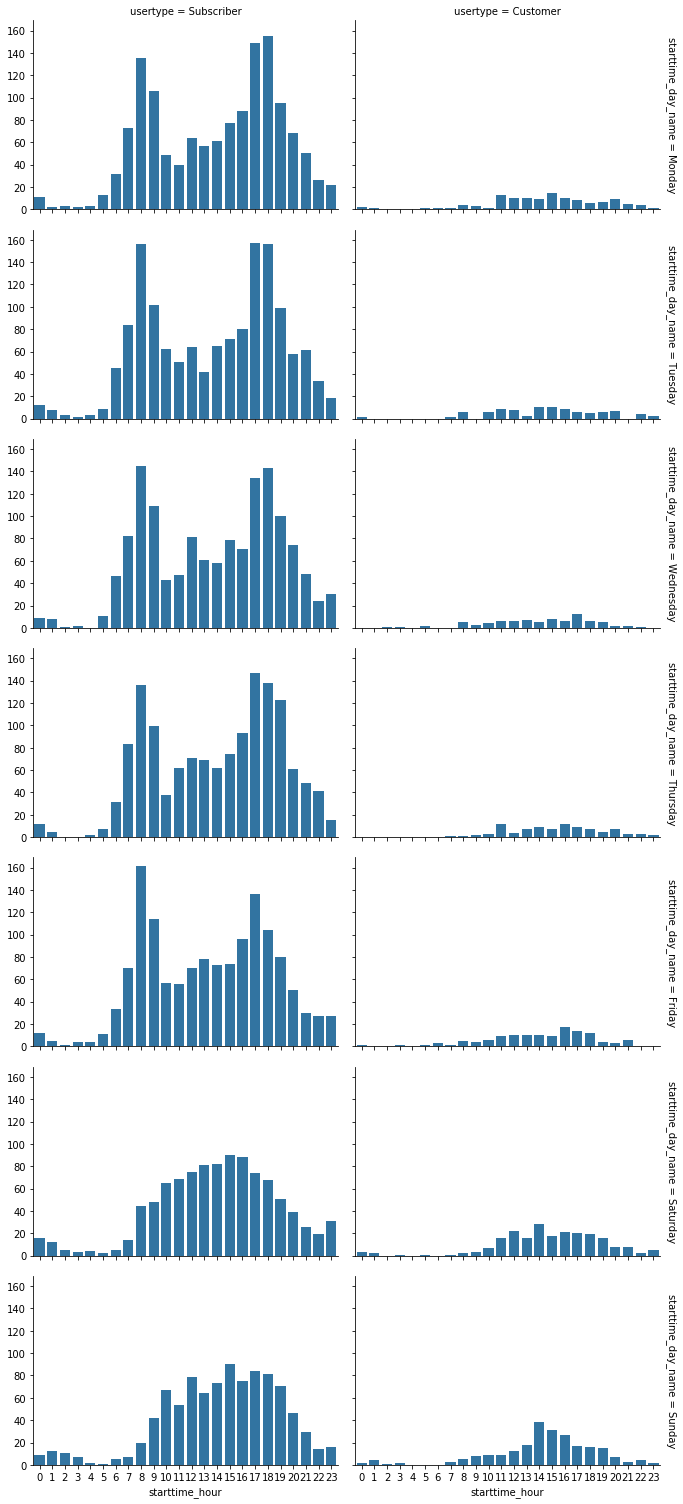

In [46]:
# Plotting Hourly trend for each day of week and usertype
g=sb.FacetGrid(data=trip, row="starttime_day_name", col="usertype", height=3, aspect=1.6, margin_titles=True);
g.map(sb.countplot, 'starttime_hour', order=hours_order);

Subscriber  - On Weekdays, plot has an addition peak at 12 hours, which means people are probably riding for lunch, but for Friday the peak is at 13 hours along with reduction in frequency at 17 hours.  Giving an insight that on Friday evenings's less rides are taken as compared to other weekday's. People are probably travelling to places other than their regular routine, using other modes of transport. 
On Saturday Subscribers have almost a uniform distribution between 8 hours to 21 hours, but on Saturday there are some spikes at 10, 12, 15, 17 hours, giving us an intution that people may be travelling for some extracurricular classes/activities.

Customer - For Customer type of users, rides during week days are very less, and looks like they ride on need basis. On weekends the number of rides is comparatively greater with peak at 14 hours.

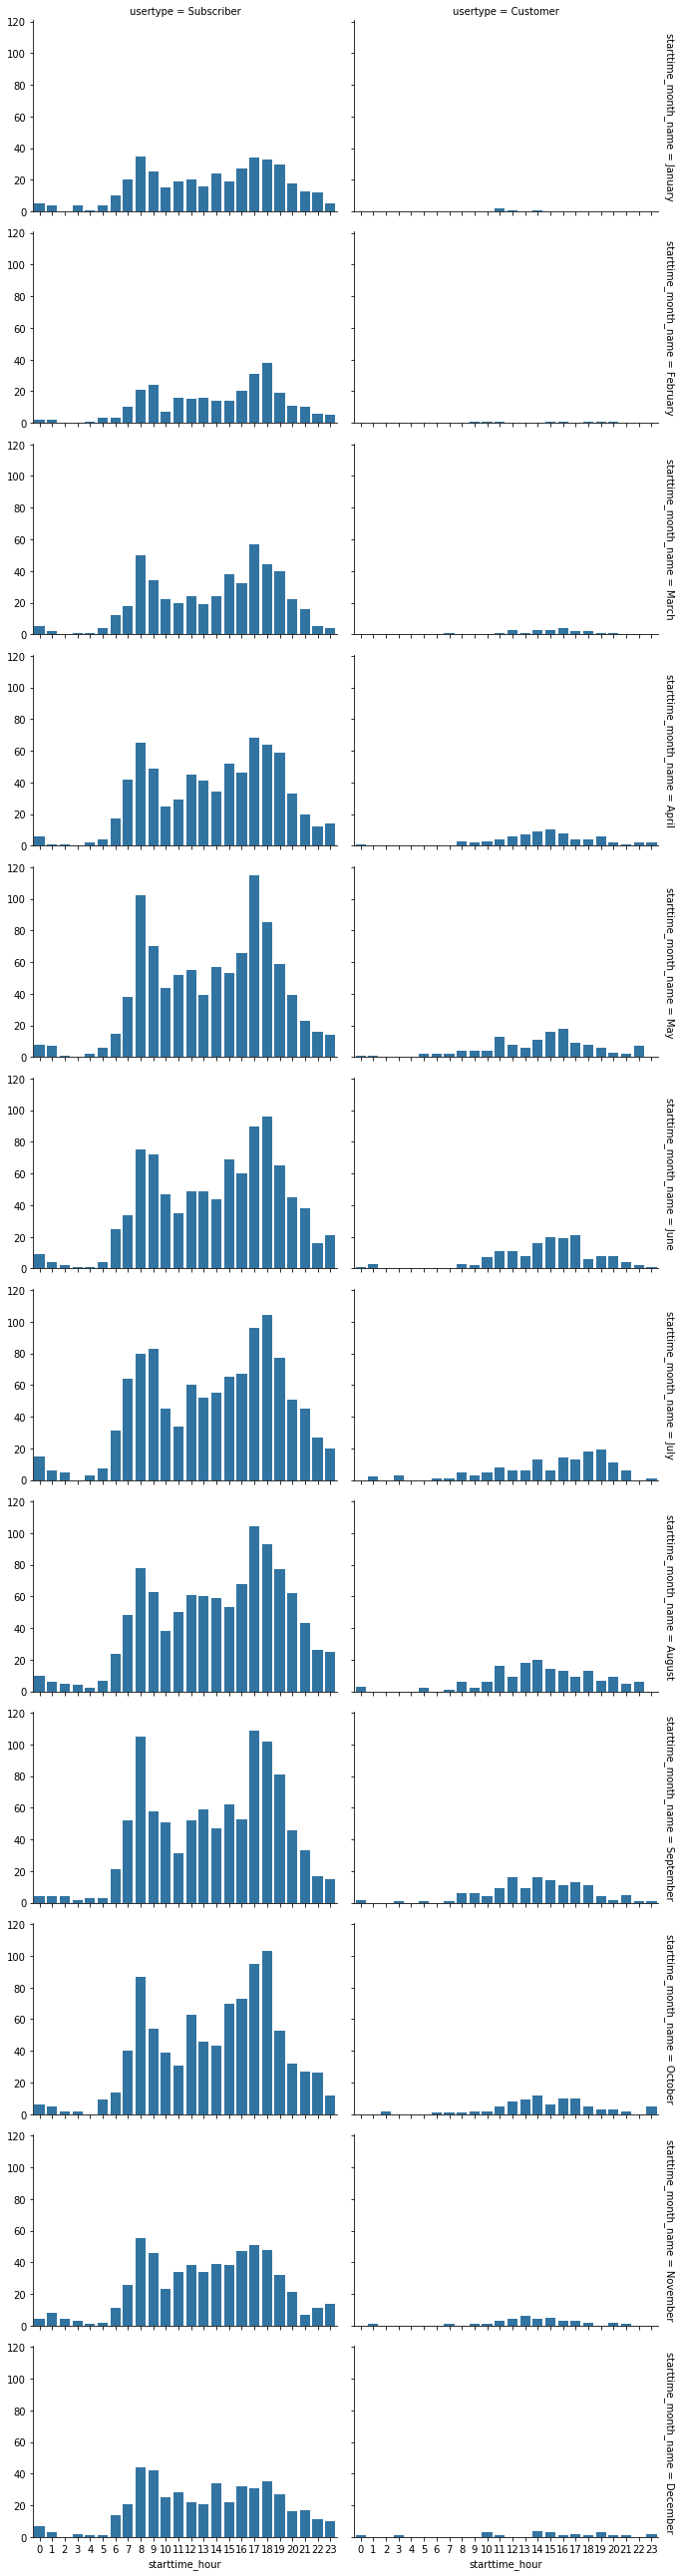

In [47]:
# Plotting Hourly trend for each month and usertype
g=sb.FacetGrid(data=trip, row="starttime_month_name", col='usertype', height=3, aspect=1.6, margin_titles=True)
g.map(sb.countplot, 'starttime_hour',order=hours_order)

For months, the trend for rides is following weather cycle, with minimum rides in February. For Customers, mostly there is a spike at 15 hours but in month of July the spike has shifted to 19 hours, this may be attributed to high temperature in July, so people like to ride in the evening.

In [48]:
short_month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [49]:
short_dayname_order = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

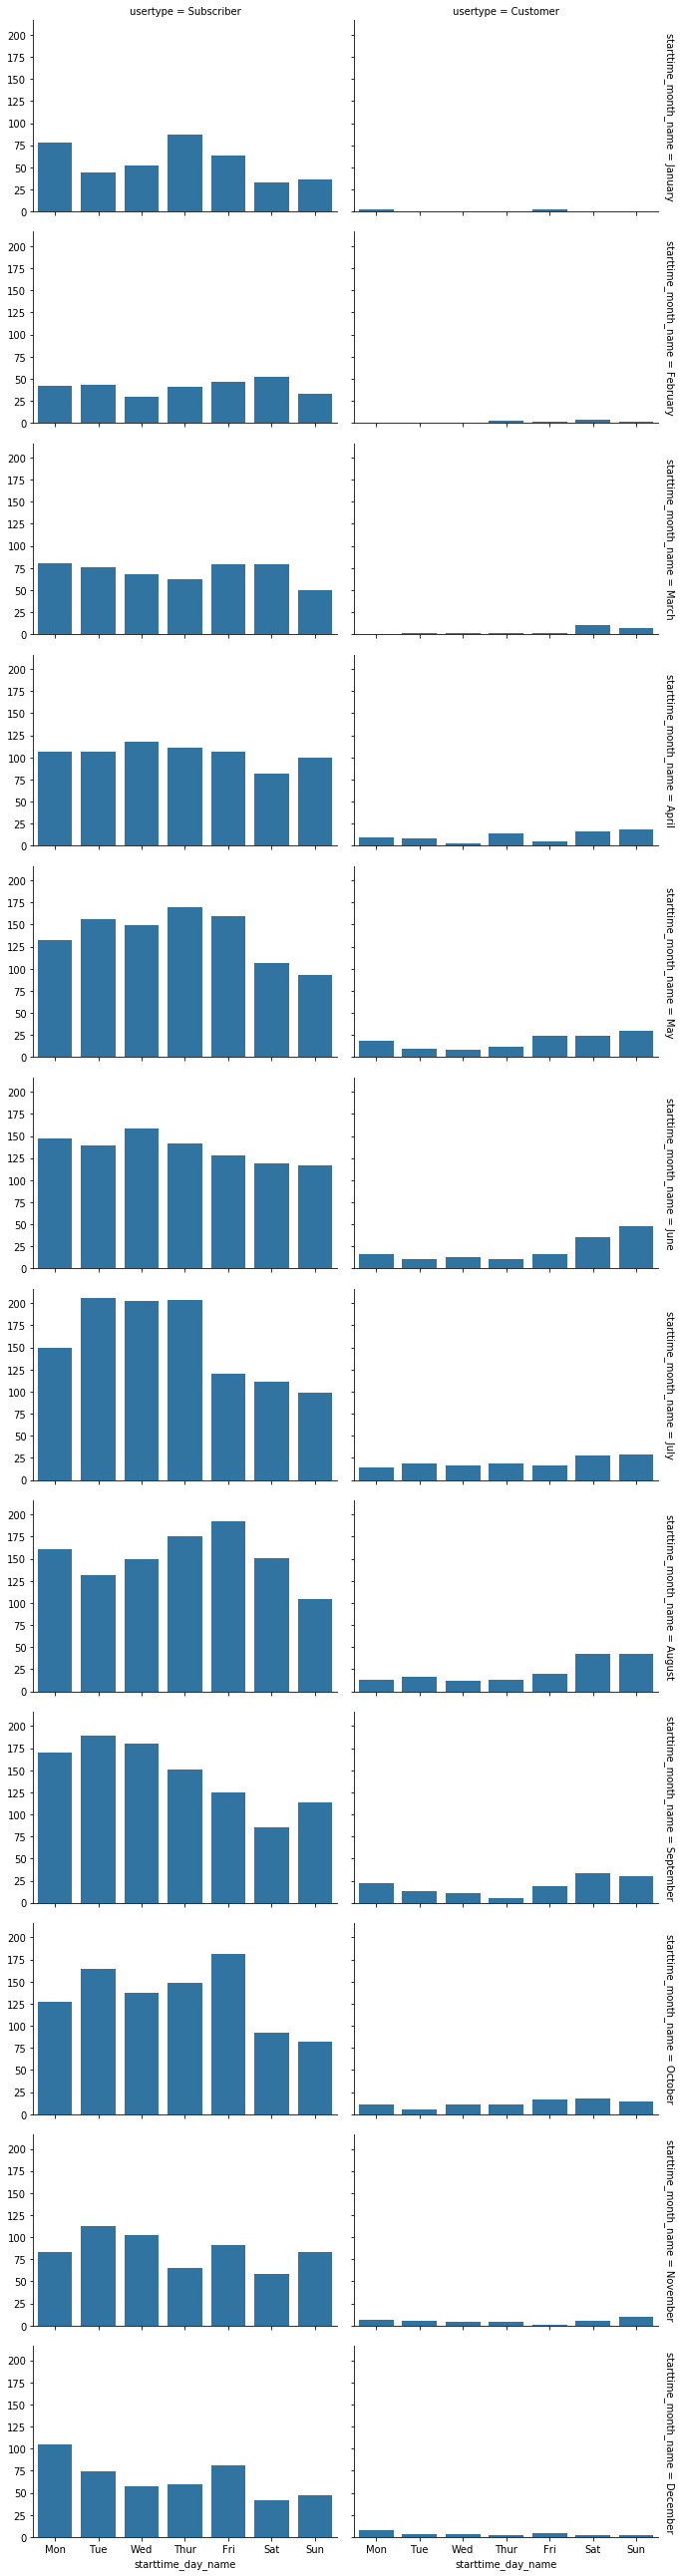

In [50]:
# Plotting Weekly trend for each month and usertype
g=sb.FacetGrid(data=trip, row="starttime_month_name",col='usertype', height=3, aspect=1.6, margin_titles=True)
g.map(sb.countplot, "starttime_day_name", order=dayname_order)
plt.xticks(np.arange(0, 7), short_dayname_order);
plt.tight_layout()

In [51]:
def maxofdf(df1,df2):
    return max(df1.max().max(),df2.max().max())

def minofdf(df1,df2):
    return min(df1.min().min(),df2.min().min())

In [52]:
# Preparing data for heatmap for number of rides for Subscriber
result1 = trip[trip["usertype"]=="Subscriber"].groupby(["starttime_month_name","starttime_day_name"]).agg({"bikeid":'count'}).reset_index().rename(columns={"starttime_month_name":"Ride Start Month", "starttime_day_name":"Ride Start Day", "bikeid":"Count"})
result1 = result1.pivot(index="Ride Start Month", columns="Ride Start Day", values="Count")

# Preparing data for heatmap for number of rides for Customer
result2 = trip[trip["usertype"]=="Customer"].groupby(["starttime_month_name","starttime_day_name"]).agg({"bikeid":'count'}).reset_index().rename(columns={"starttime_month_name":"Ride Start Month", "starttime_day_name":"Ride Start Day", "bikeid":"Count"})
result2 = result2.pivot(index="Ride Start Month", columns="Ride Start Day", values="Count")

In [53]:
# Preparing data for heatmap for tripduration for Subscriber
trip_dur_year_s = trip[trip["usertype"]=="Subscriber"].groupby(["starttime_month_name","starttime_day_name"]).agg({"tripduration_min":'sum'}).reset_index().rename(columns={"starttime_month_name":"Ride Start Month", "starttime_day_name":"Ride Start Day", "tripduration_min":"Ride Duration(min)"})
trip_dur_year_s = trip_dur_year_s.pivot(index="Ride Start Month", columns="Ride Start Day", values="Ride Duration(min)")

# Preparing data for heatmap for tripduration for Customer
trip_dur_year_c = trip[trip["usertype"]=="Customer"].groupby(["starttime_month_name","starttime_day_name"]).agg({"tripduration_min":'sum'}).reset_index().rename(columns={"starttime_month_name":"Ride Start Month", "starttime_day_name":"Ride Start Day", "tripduration_min":"Ride Duration(min)"})
trip_dur_year_c = trip_dur_year_c.pivot(index="Ride Start Month", columns="Ride Start Day", values="Ride Duration(min)")


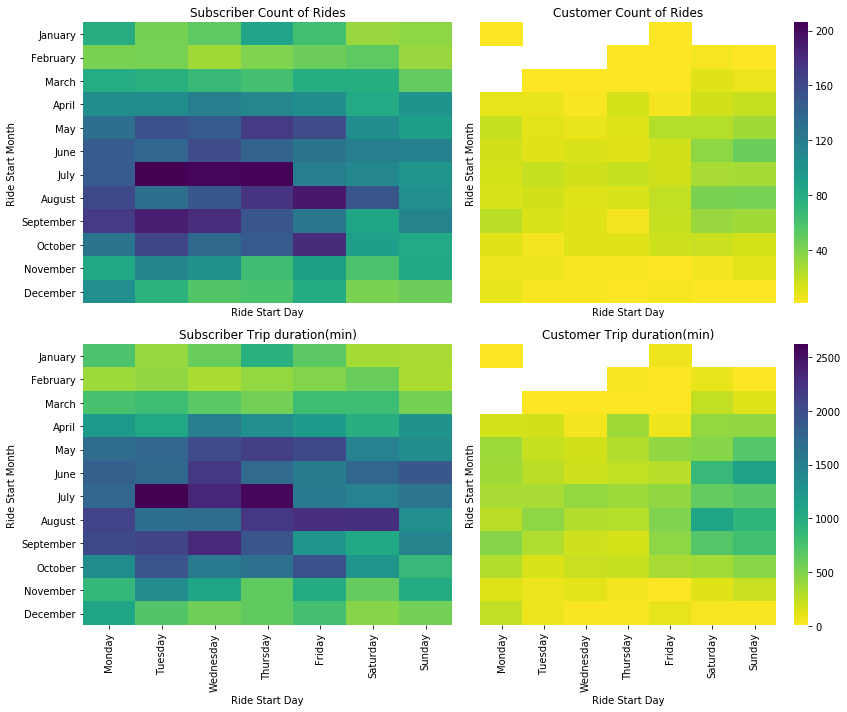

In [54]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

# Plotting heatmap for number of rides for Subscriber
sb.heatmap(result1, cmap="viridis_r", ax=ax[0,0], fmt="",vmin=minofdf(result1, result2),vmax=maxofdf(result1, result2), cbar=False,xticklabels=False)
ax[0,0].set_title("Subscriber Count of Rides")

# Plotting heatmap for number of rides for Customer
sb.heatmap(result2, cmap="viridis_r", ax=ax[0,1], fmt="",vmin=minofdf(result1, result2),vmax=maxofdf(result1, result2), yticklabels=False,xticklabels=False)
ax[0,1].set_title("Customer Count of Rides")

# Plotting heatmap for tripduration for Subscriber
sb.heatmap(trip_dur_year_s, cmap="viridis_r", ax=ax[1,0], fmt="",vmin=minofdf(trip_dur_year_s, trip_dur_year_c),vmax=maxofdf(trip_dur_year_s, trip_dur_year_c),cbar=False)
ax[1,0].set_title("Subscriber Trip duration(min)")

# Plotting heatmap for tripduration for Customer
sb.heatmap(trip_dur_year_c, cmap="viridis_r", ax=ax[1,1], fmt="",vmin=minofdf(trip_dur_year_s, trip_dur_year_c),vmax=maxofdf(trip_dur_year_s, trip_dur_year_c),yticklabels=False)
ax[1,1].set_title("Customer Trip duration(min)")

plt.tight_layout()

For Subscriber, Total Trip duration in weekdays is mostly greater than that in weekends.While for Customer, Total Trip duration in weekdays is mostly less than that in weekends

Subscriber -  Trip duration and count of rides are greater for months April to October and Monday to Friday. In July, Trip duration and count of trips is maximum on Tuesday, Wednesday and Thursday, giving a intuition that these days might be holidays. Similar but less prominent trend is observed for January-Monday, Thursday, May-Wednesday, Thursday and Friday, August-Thursday, Friday, Saturday, September-Monday Tuesday, Wednesday, October-Friday, April-Thursday

Customer - Interestingly for June and August - Saturday, Sunday, high trip duration and trip counts observed. Similar but less prominent trend is observed for September-Monday, May-Monday.

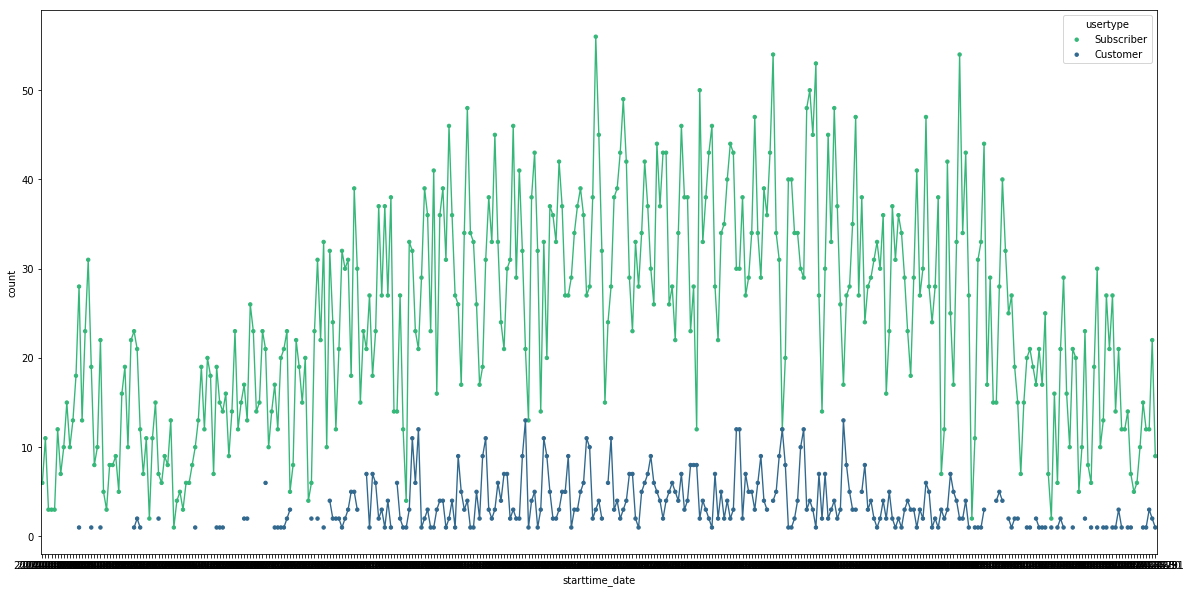

In [55]:
# Plotting Date Vs total rides count

plt.figure(figsize=[20,10])
date_usertype_df= trip.groupby(['starttime_date','usertype']).agg({'bikeid':'count'}).reset_index().rename(columns={'bikeid':'count'})

ax = sb.pointplot(x='starttime_date', y='count', hue='usertype', palette='viridis_r', scale=.5, data=date_usertype_df)

Lets plot the above plot with Monthly total rides on y axis.

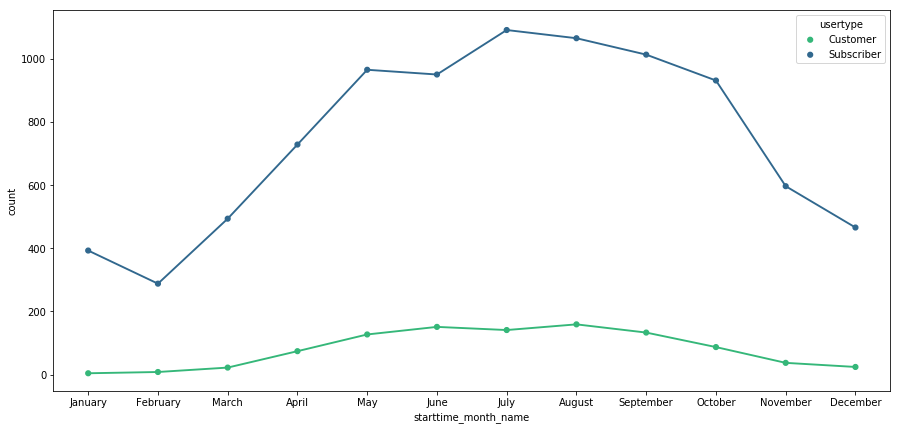

In [56]:
# Overall Trend : Month Vs total rides count
plt.figure(figsize=[15,7])
month_usertype_df= trip.groupby(['starttime_month_name','usertype']).agg({'bikeid':'count'}).reset_index().rename(columns={'bikeid':'count'})

ax = sb.pointplot(x='starttime_month_name', y='count', hue='usertype', palette='viridis_r', scale=.7, data=month_usertype_df)

For Subscribers, Total Number of rides decrease in June, then increase again in July.For Customers, Total Number of rides decrease in July, then increase again in August.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> For Subscribers, on Weekdays, plot had an addition peak at 12 hours, which is probably beacuse people are riding for lunch, but for Friday the peak is at 13 hours along with reduction in frequency at 17 hours.  Giving an insight that on Friday evenings's less rides are taken as compared to other weekday's. People are probably travelling to places other than their regular routine, using other modes of transport. 
On Saturday Subscribers have almost a uniform distribution between 8 hours to 21 hours, but on Saturday there are some spikes at 10, 12, 15, 17 hours, giving us an intution that people may be travelling for some extracurricular classes/activities.

> For Customer type of users, rides during week days are very less, and looks like they ride on need basis. On weekends the number of rides is comparatively greater with peak at 14 hours.

> For Subscribers, Total Number of rides decrease in June, then increase again in July.For Customers, Total Number of rides decrease in July, then increase again in August.


> tripduration strenghtened the count of rides feature, giving us an overall view of the trend.

### Were there any interesting or surprising interactions between features?

> Interaction between tripduration and count of trips gives us an interesting insight about some special days of the year when both the tripduration and count of trips were at high end. Such days can be some holidays or some bike riding event.